In [0]:
'''
tensorflow core
LR
Classification
Clustering
HMM
'''

'\ntensorflow core\nLR\nClassification\nClustering\nHMM\n'

(0.0, 6.0, 0.0, 20.0)

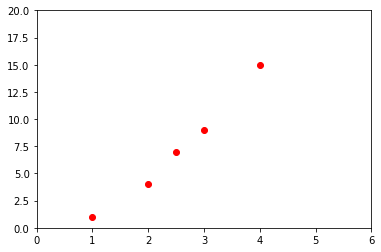

In [0]:
'''
Linear Regression
'''
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

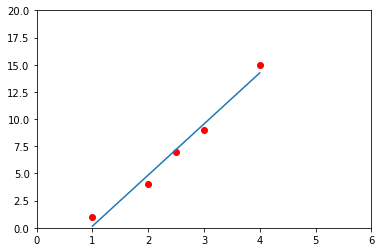

In [0]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [0]:
pip install -q sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc 

import tensorflow as tf


In [0]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = df_train.pop('survived')
y_test = df_test.pop('survived')

In [0]:
df_train.head(5)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [0]:
print(y_train)
print(y_test)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64
0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64


In [0]:
df_train.loc[0]

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

In [0]:
print(df_train['age'].mean())
print(df_train['age'].median())

29.631307814992027
28.0


In [0]:
df_train.describe()
'''
only on numeric feas
'''

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
'''
see how much the train and test sets are alike
'''
df_test.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


In [0]:
df_train.shape, df_test.shape

((627, 9), (264, 9))

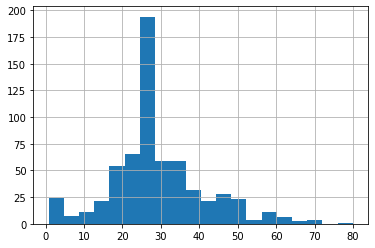

In [0]:
'''
EDA
for numerics you can have histograms.
'''
df_train['age'].hist(bins=20)

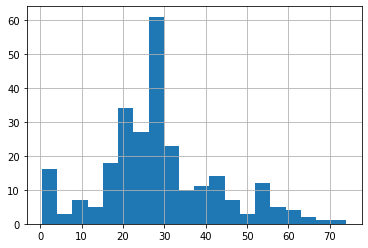

In [0]:
df_test['age'].hist(bins=20)

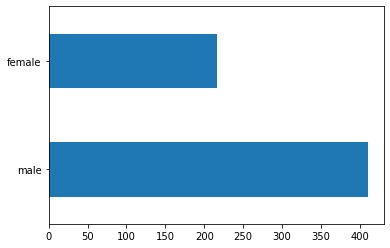

In [0]:
'''
for categorical features we do bar plots.
'''
df_train['sex'].value_counts().plot(kind='barh')

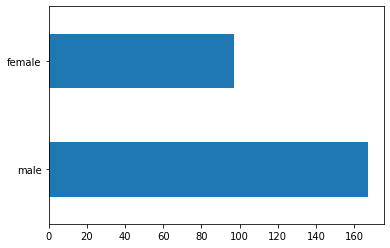

In [0]:
df_test['sex'].value_counts().plot(kind='barh')

In [0]:
counts = df_train['sex'].value_counts()
male_to_female_ratio = counts[0] / counts[1]
male_to_female_ratio

1.8894009216589862

In [0]:
counts = df_test['sex'].value_counts()
male_to_female_ratio = counts[0] / counts[1]
male_to_female_ratio
'''
they are kind of alike.
'''

1.7216494845360826

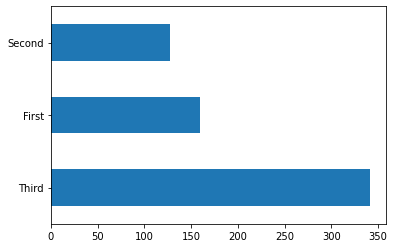

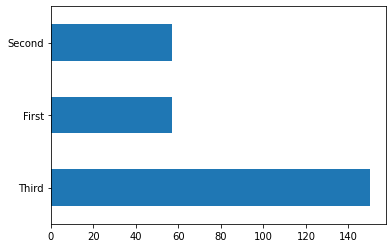

In [0]:
df_train['class'].value_counts().plot(kind='barh')
plt.figure()
df_test['class'].value_counts().plot(kind='barh')

Text(0.5, 0, 'survival %')

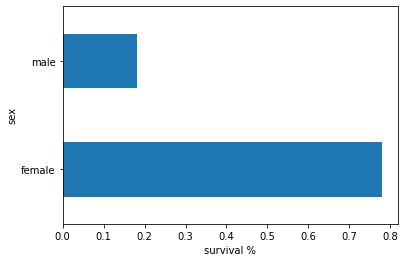

In [0]:
pd.concat([df_train, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('survival %')

In [0]:
pd.concat([df_train, y_train], axis=1).groupby('sex').survived.mean()

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64

Text(0.5, 0, '%')

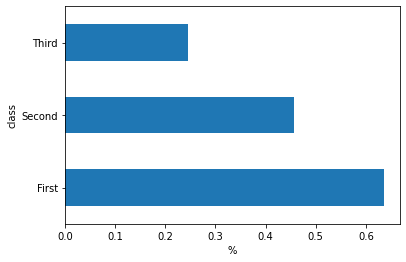

In [0]:
'''
class first had a higher survival rate as opposed.
'''
pd.concat([df_train, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('%')